In [1]:
## importing necessary libraries
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer

In [2]:
import os 
os.getcwd()

'C:\\Users\\Admin'

In [3]:
os.chdir('C:\\Users\\Admin\\Downloads')

In [4]:
imdb_dataset = pd.read_csv('IMDB Dataset.csv')
imdb_dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
imdb_dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
import nltk
nltk.download("stopwords")

stop_words = set(stopwords.words('english'))

lemma = WordNetLemmatizer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
## creating a funct to clean the data

def clean_reviews(data):
    data = re.sub(r'http\S+',' ',data)
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = str(data).lower()
    data = word_tokenize(data)
    data = [i for i in data if i not in stop_words]
    data = [lemma.lemmatize(word = w, pos = 'v') for w in data]
    data = [i for i in data if len(i) > 2]
    data = ' '.join(data)
    return data





In [12]:
imdb_dataset['clean_reviews'] = imdb_dataset['review'].apply(clean_reviews)

In [13]:
imdb_dataset.head()

,review,sentiment,clean_reviews
0,One of the other reviewers has mentioned that ...,positive,one reviewers mention watch episode hook right...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stun fi...


In [14]:
imdb_dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

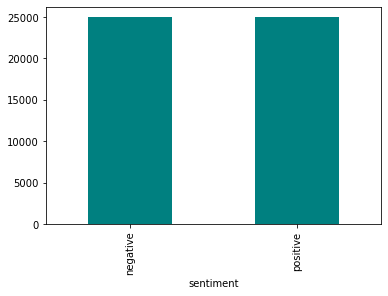

In [15]:
imdb_dataset.groupby('sentiment')['sentiment'].agg('count').plot(kind= 'bar',color = 'teal');

In [16]:
imdb_dataset.describe()['sentiment']

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

In [17]:
## Text Visualization

#segreate positive and negative reviews

positive_review = imdb_dataset[imdb_dataset['sentiment'] == 'positive']['clean_reviews']
negative_review = imdb_dataset[imdb_dataset['sentiment'] == 'negative']['clean_reviews']

In [18]:
positive_review.head()

0    one reviewers mention watch episode hook right...
1    wonderful little production film technique una...
2    think wonderful way spend time hot summer week...
4    petter mattei love time money visually stun fi...
5    probably time favorite movie story selflessnes...
Name: clean_reviews, dtype: object

In [19]:
negative_review.head()

3     basically family little boy jake think zombie ...
7     show amaze fresh innovative idea first air fir...
8     encourage positive comment film look forward w...
10    phil alien one quirky film humour base around ...
11    saw movie come recall scariest scene big bird ...
Name: clean_reviews, dtype: object

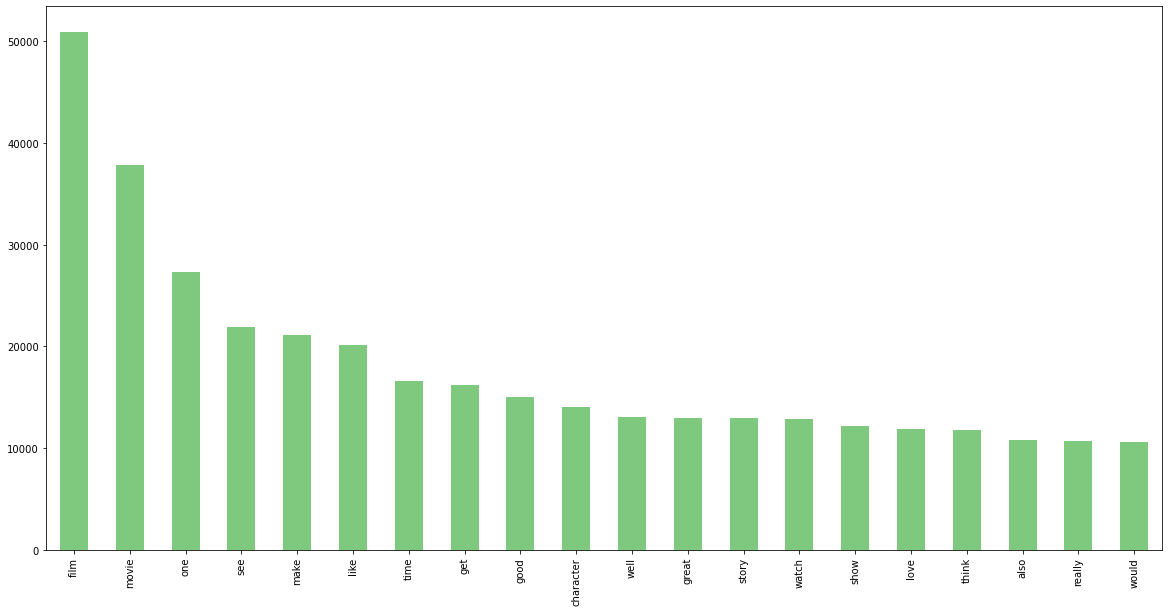

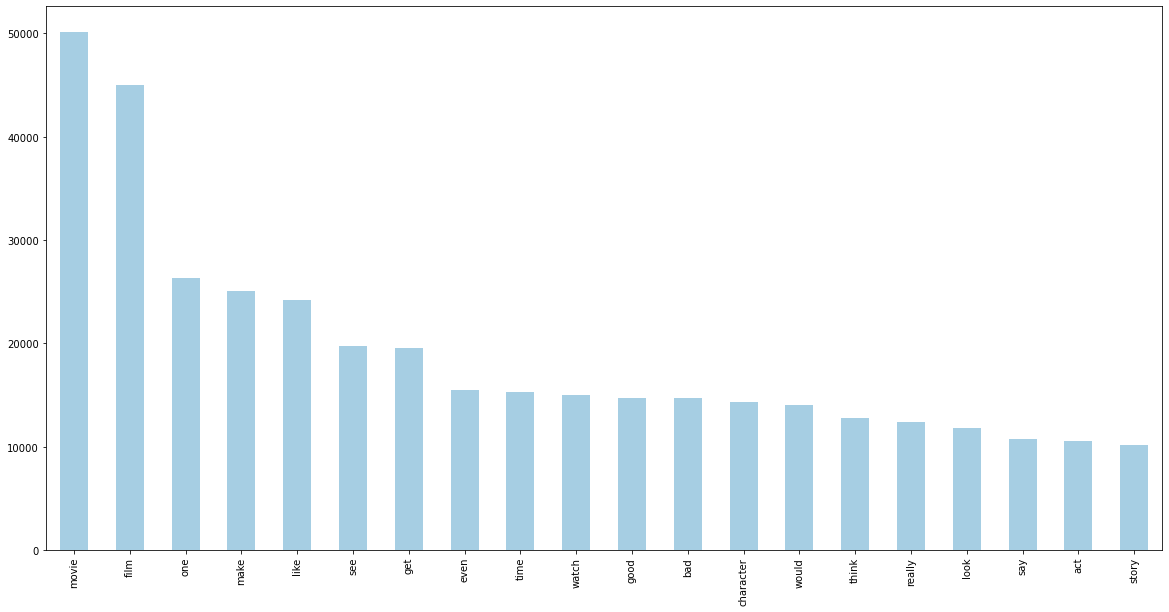

In [20]:
## Word wise impact in each sentiment

color = ['Accent','Paired']
split_data = [positive_review,negative_review]

for i in range(2):
    plt.figure(figsize = (20,10))
    pd.Series(' '.join([j for j in split_data[i]]).split()).value_counts().head(20).plot(kind = 'bar',colormap = color[i])
    plt.show()

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
positive_review = pd.DataFrame(positive_review)
negative_review = pd.DataFrame(negative_review)

In [23]:
positive_words= ' '.join(positive_review['clean_reviews'])

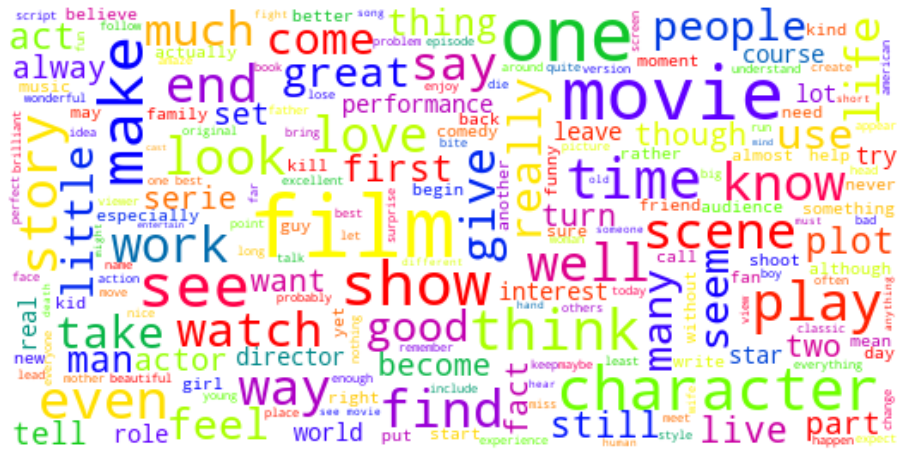

In [24]:
## Creating a word cloud to visualize most frequent words in a better way

positive_cloud= WordCloud(width =520, height =260, stopwords= STOPWORDS, max_font_size= 50, background_color = 'white', colormap= 'prism').generate(positive_words)
plt.figure(figsize=(16,10))
plt.imshow(positive_cloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

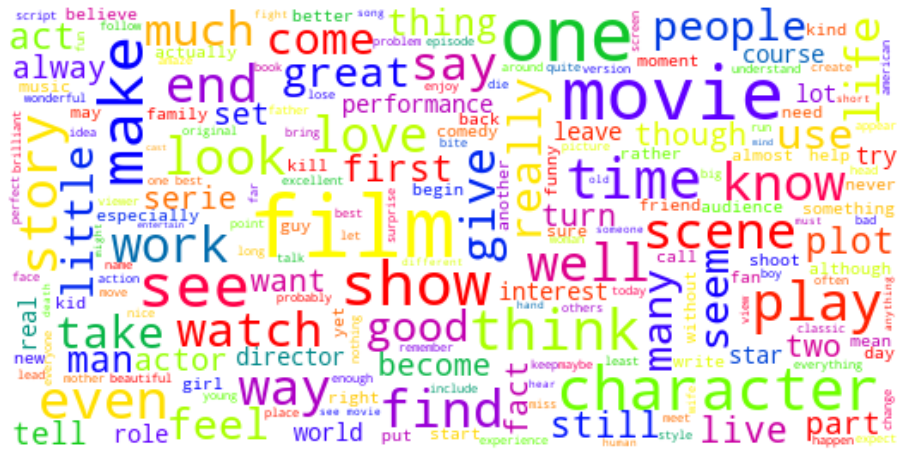

In [25]:
negative_words= ' '.join(negative_review['clean_reviews'])

negative_cloud= WordCloud(width =520, height =260, stopwords= STOPWORDS, max_font_size= 50, background_color = 'white', colormap= 'prism').generate(negative_words)
plt.figure(figsize=(16,10))
plt.imshow(positive_cloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [26]:
imdb_dataset.drop('review',axis =1,inplace = True)
imdb_dataset.head(10)

,sentiment,clean_reviews
0,positive,one reviewers mention watch episode hook right...
1,positive,wonderful little production film technique una...
2,positive,think wonderful way spend time hot summer week...
3,negative,basically family little boy jake think zombie ...
4,positive,petter mattei love time money visually stun fi...
5,positive,probably time favorite movie story selflessnes...
6,positive,sure would like see resurrection date seahunt ...
7,negative,show amaze fresh innovative idea first air fir...
8,negative,encourage positive comment film look forward w...
9,positive,like original gut wrench laughter like movie y...


In [27]:
# Replacing positive as 1 and negtaive as 0
imdb_dataset['sentiment']=imdb_dataset['sentiment'].replace(to_replace='positive',value=1)
imdb_dataset['sentiment']=imdb_dataset['sentiment'].replace(to_replace='negative',value=0)

imdb_dataset.head()

,sentiment,clean_reviews
0,1,one reviewers mention watch episode hook right...
1,1,wonderful little production film technique una...
2,1,think wonderful way spend time hot summer week...
3,0,basically family little boy jake think zombie ...
4,1,petter mattei love time money visually stun fi...


In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
from nltk import tokenize


In [29]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(imdb_dataset['clean_reviews']).toarray()

In [103]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
y = imdb_dataset['sentiment']

In [122]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [124]:
#training model using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [125]:
y_pred= nb.predict(X_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

display('Confusion Matrix', confusion_matrix(y_test,y_pred),
       'Accuracy Score', accuracy_score(y_test, y_pred))


'Confusion Matrix'

array([[4236,  799],
       [ 703, 4262]], dtype=int64)

'Accuracy Score'

0.8498

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5035
           1       0.84      0.86      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [128]:
from keras.utils import to_categorical
y = to_categorical(y)
y


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [130]:
y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [131]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(22, input_dim = 3000, activation = 'softmax'))
model.add(Dense(12, activation = 'softmax'))
model.add(Dense(2, activation = 'softmax'))

In [132]:
# configure

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#and start training
model.fit(X_train, y_train, epochs=20, batch_size=3, verbose=1
         )

Epoch 1/20
40000/40000 [==============================] - 24s 607us/step - loss: 0.4367 - accuracy: 0.8084
Epoch 2/20
40000/40000 [==============================] - 24s 596us/step - loss: 0.2852 - accuracy: 0.8848
Epoch 3/20
40000/40000 [==============================] - 27s 673us/step - loss: 0.2789 - accuracy: 0.8896
Epoch 4/20
40000/40000 [==============================] - 26s 658us/step - loss: 0.2777 - accuracy: 0.8899
Epoch 5/20
40000/40000 [==============================] - 24s 591us/step - loss: 0.2778 - accuracy: 0.8910
Epoch 6/20
40000/40000 [==============================] - 27s 668us/step - loss: 0.2776 - accuracy: 0.8912
Epoch 7/20
40000/40000 [==============================] - 22s 560us/step - loss: 0.2771 - accuracy: 0.8932
Epoch 8/20
40000/40000 [==============================] - 23s 571us/step - loss: 0.2746 - accuracy: 0.8943
Epoch 9/20
40000/40000 [==============================] - 22s 550us/step - loss: 0.2730 - accuracy: 0.8945
Epoch 10/20
40000/40000 [============

In [133]:
y_pred_n = model.predict_classes(X_test)

In [134]:
y_pred_n

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [135]:
y = imdb_dataset['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [136]:
y_test

11841    1
19602    0
45519    0
25747    1
42642    1
        ..
25091    0
27853    0
47278    1
37020    1
2217     0
Name: sentiment, Length: 10000, dtype: int64

In [137]:
display('Confusion Matrix', confusion_matrix(y_test,y_pred_n),
       'Accuracy Score', accuracy_score(y_test, y_pred_n))


'Confusion Matrix'

array([[4463,  572],
       [ 596, 4369]], dtype=int64)

'Accuracy Score'

0.8832